In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install pytesseract
!sudo apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [6]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

In [7]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

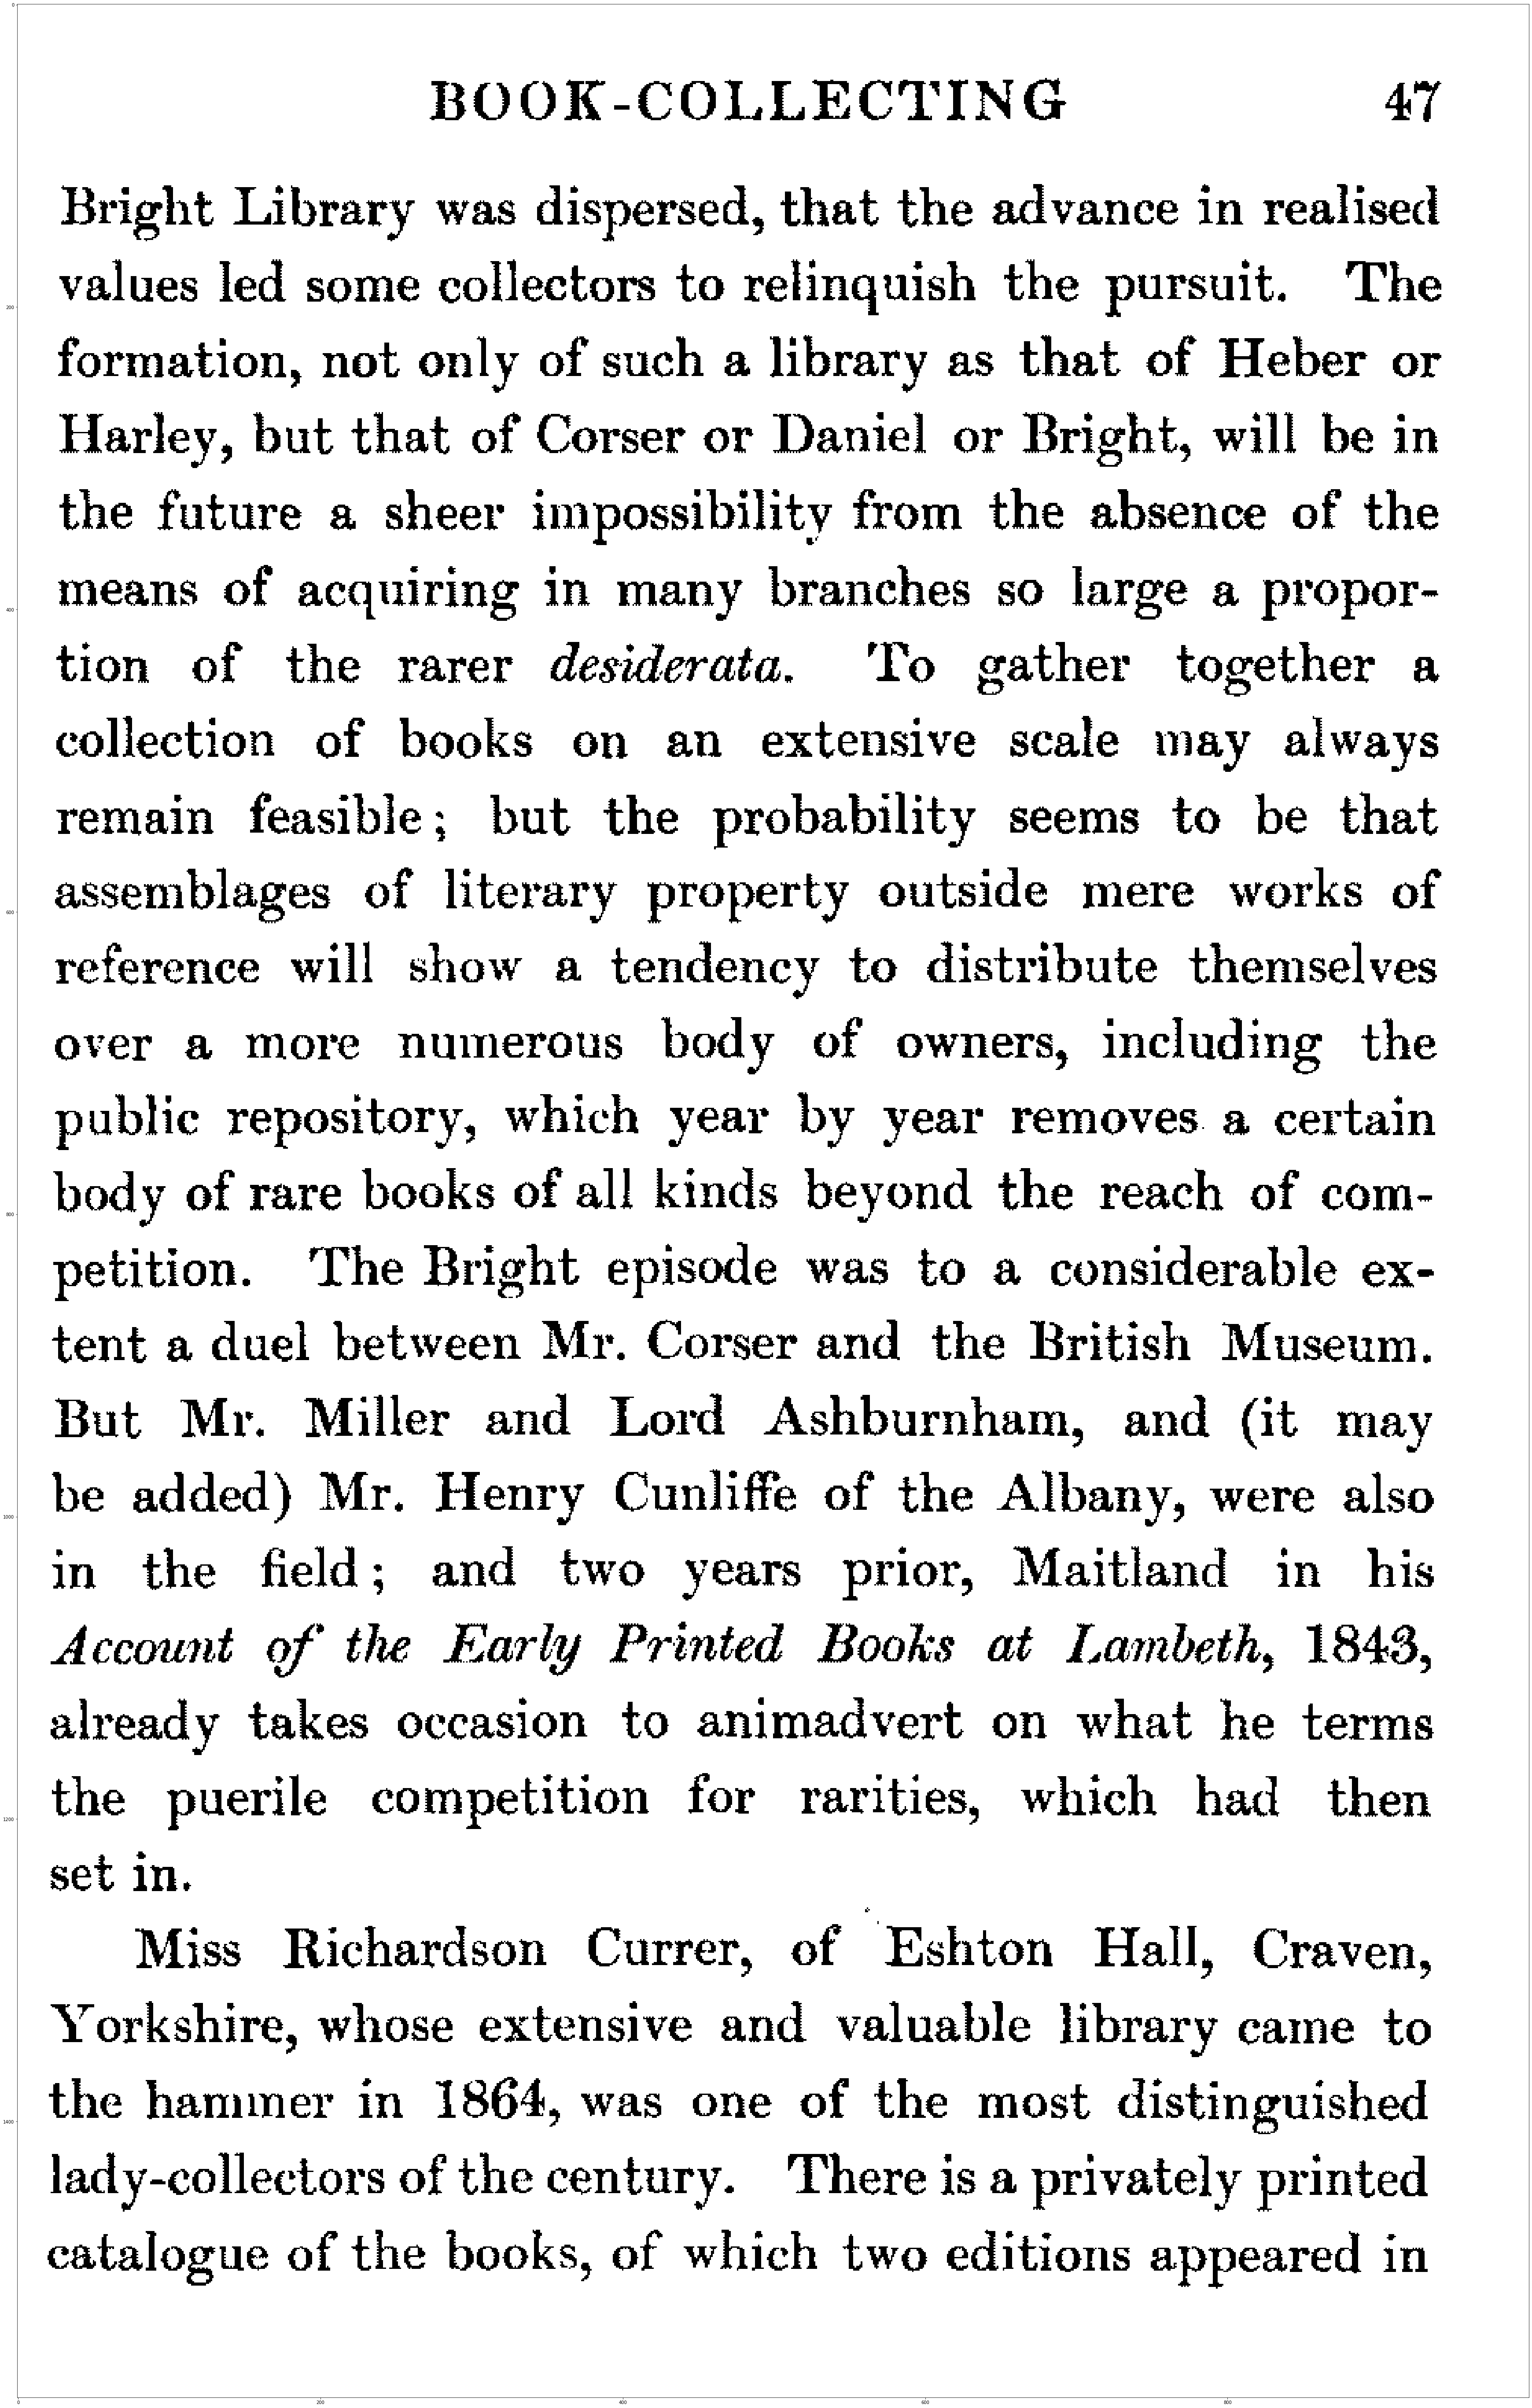

In [10]:
# Подключение фото
img = cv2.imread('testPhoto.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure("Pure",figsize=(100,100))
plt.imshow(img)
plt.show()

In [12]:
# Будет выведен весь текст с картинки
print(pytesseract.image_to_string(img,lang='eng'))

BOOK-COLLECTING 47

Bright Library was dispersed, that the advance in realised
values led some collectors to relinquish the pursuit. The
formation, not only of such a library as that of Heber or
Harley, but that of Corser or Daniel or Bright, will be in
the future a sheer impossibility from the absence of the
means of acquiring in many branches so large a propor-
tion of the rarer desiderata. 'To gather together a
collection of books on an extensive scale may always
remain feasible; but the probability seems to be that
assemblages of literary property outside mere works of
reference will show a tendency to distribute themselves
over a more numerous body of owners, including the
public repository, which year by year removes. a certain
body of rare books of all kinds beyond the reach of com-
petition. The Bright episode was to a considerable ex-
tent a duel between Mr. Corser and the British Museum.
But Mr. Miller and Lord Ashburnham, and (it may
be added) Mr. Henry Cunliffe of the Alban

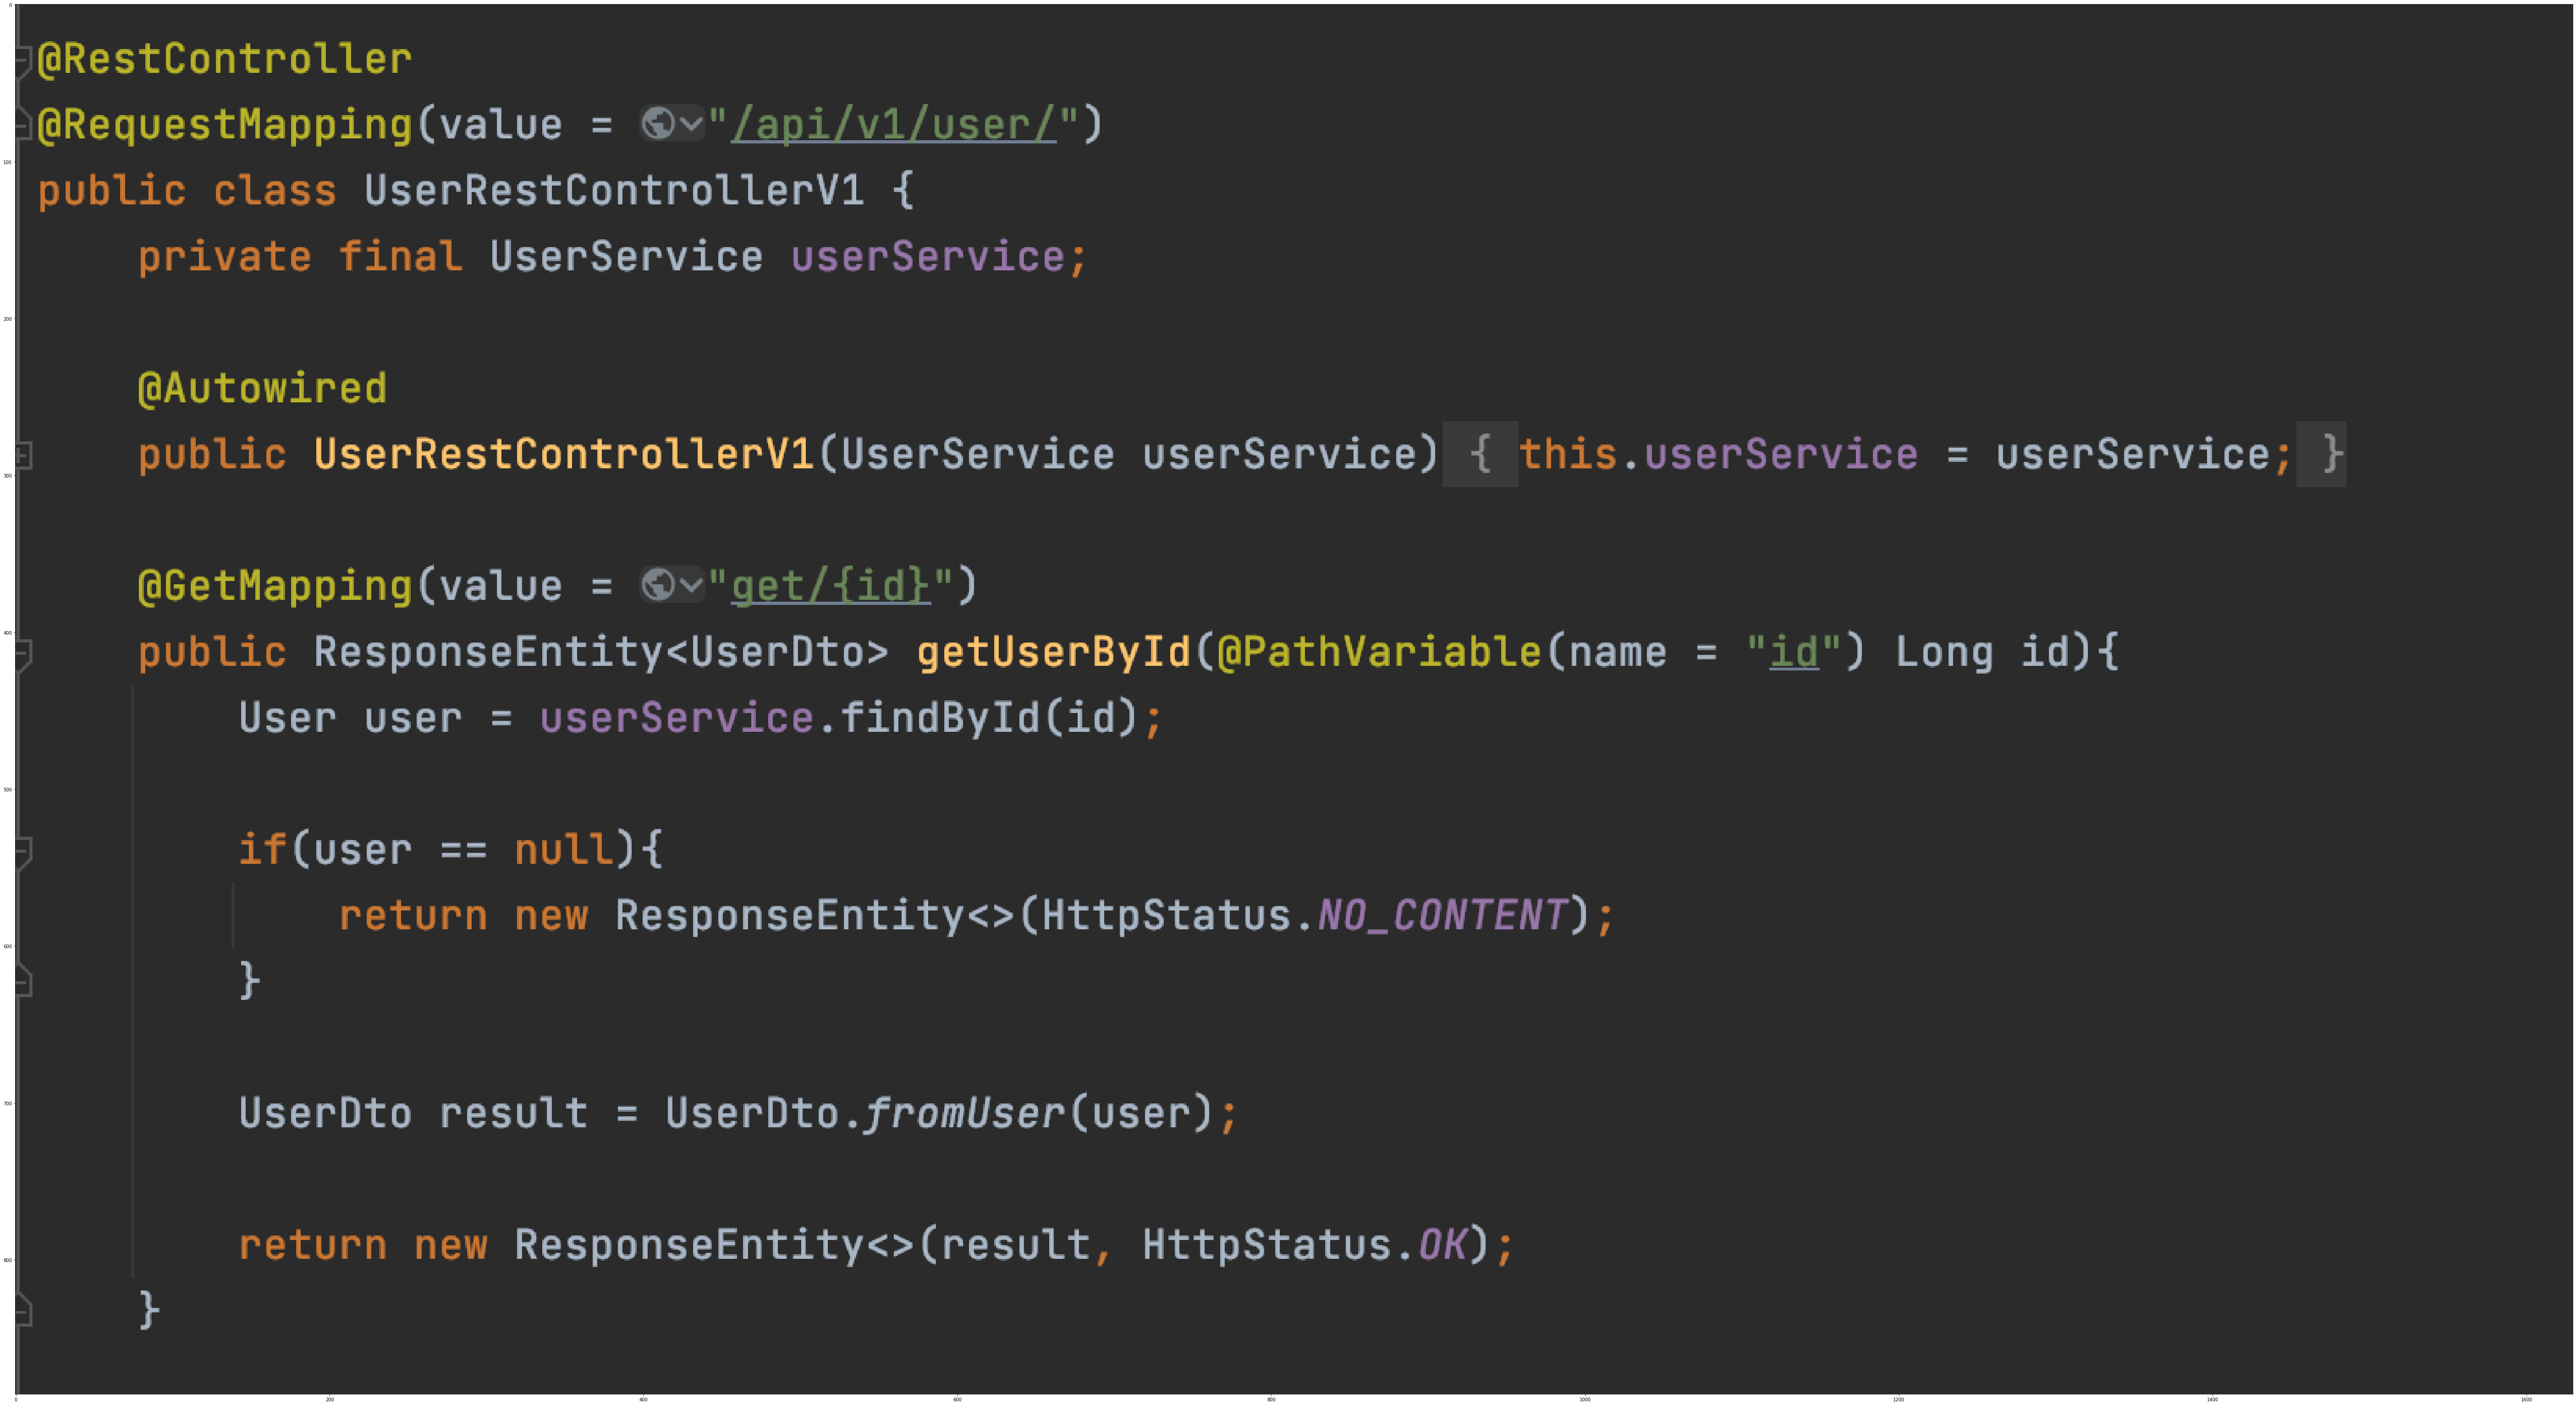

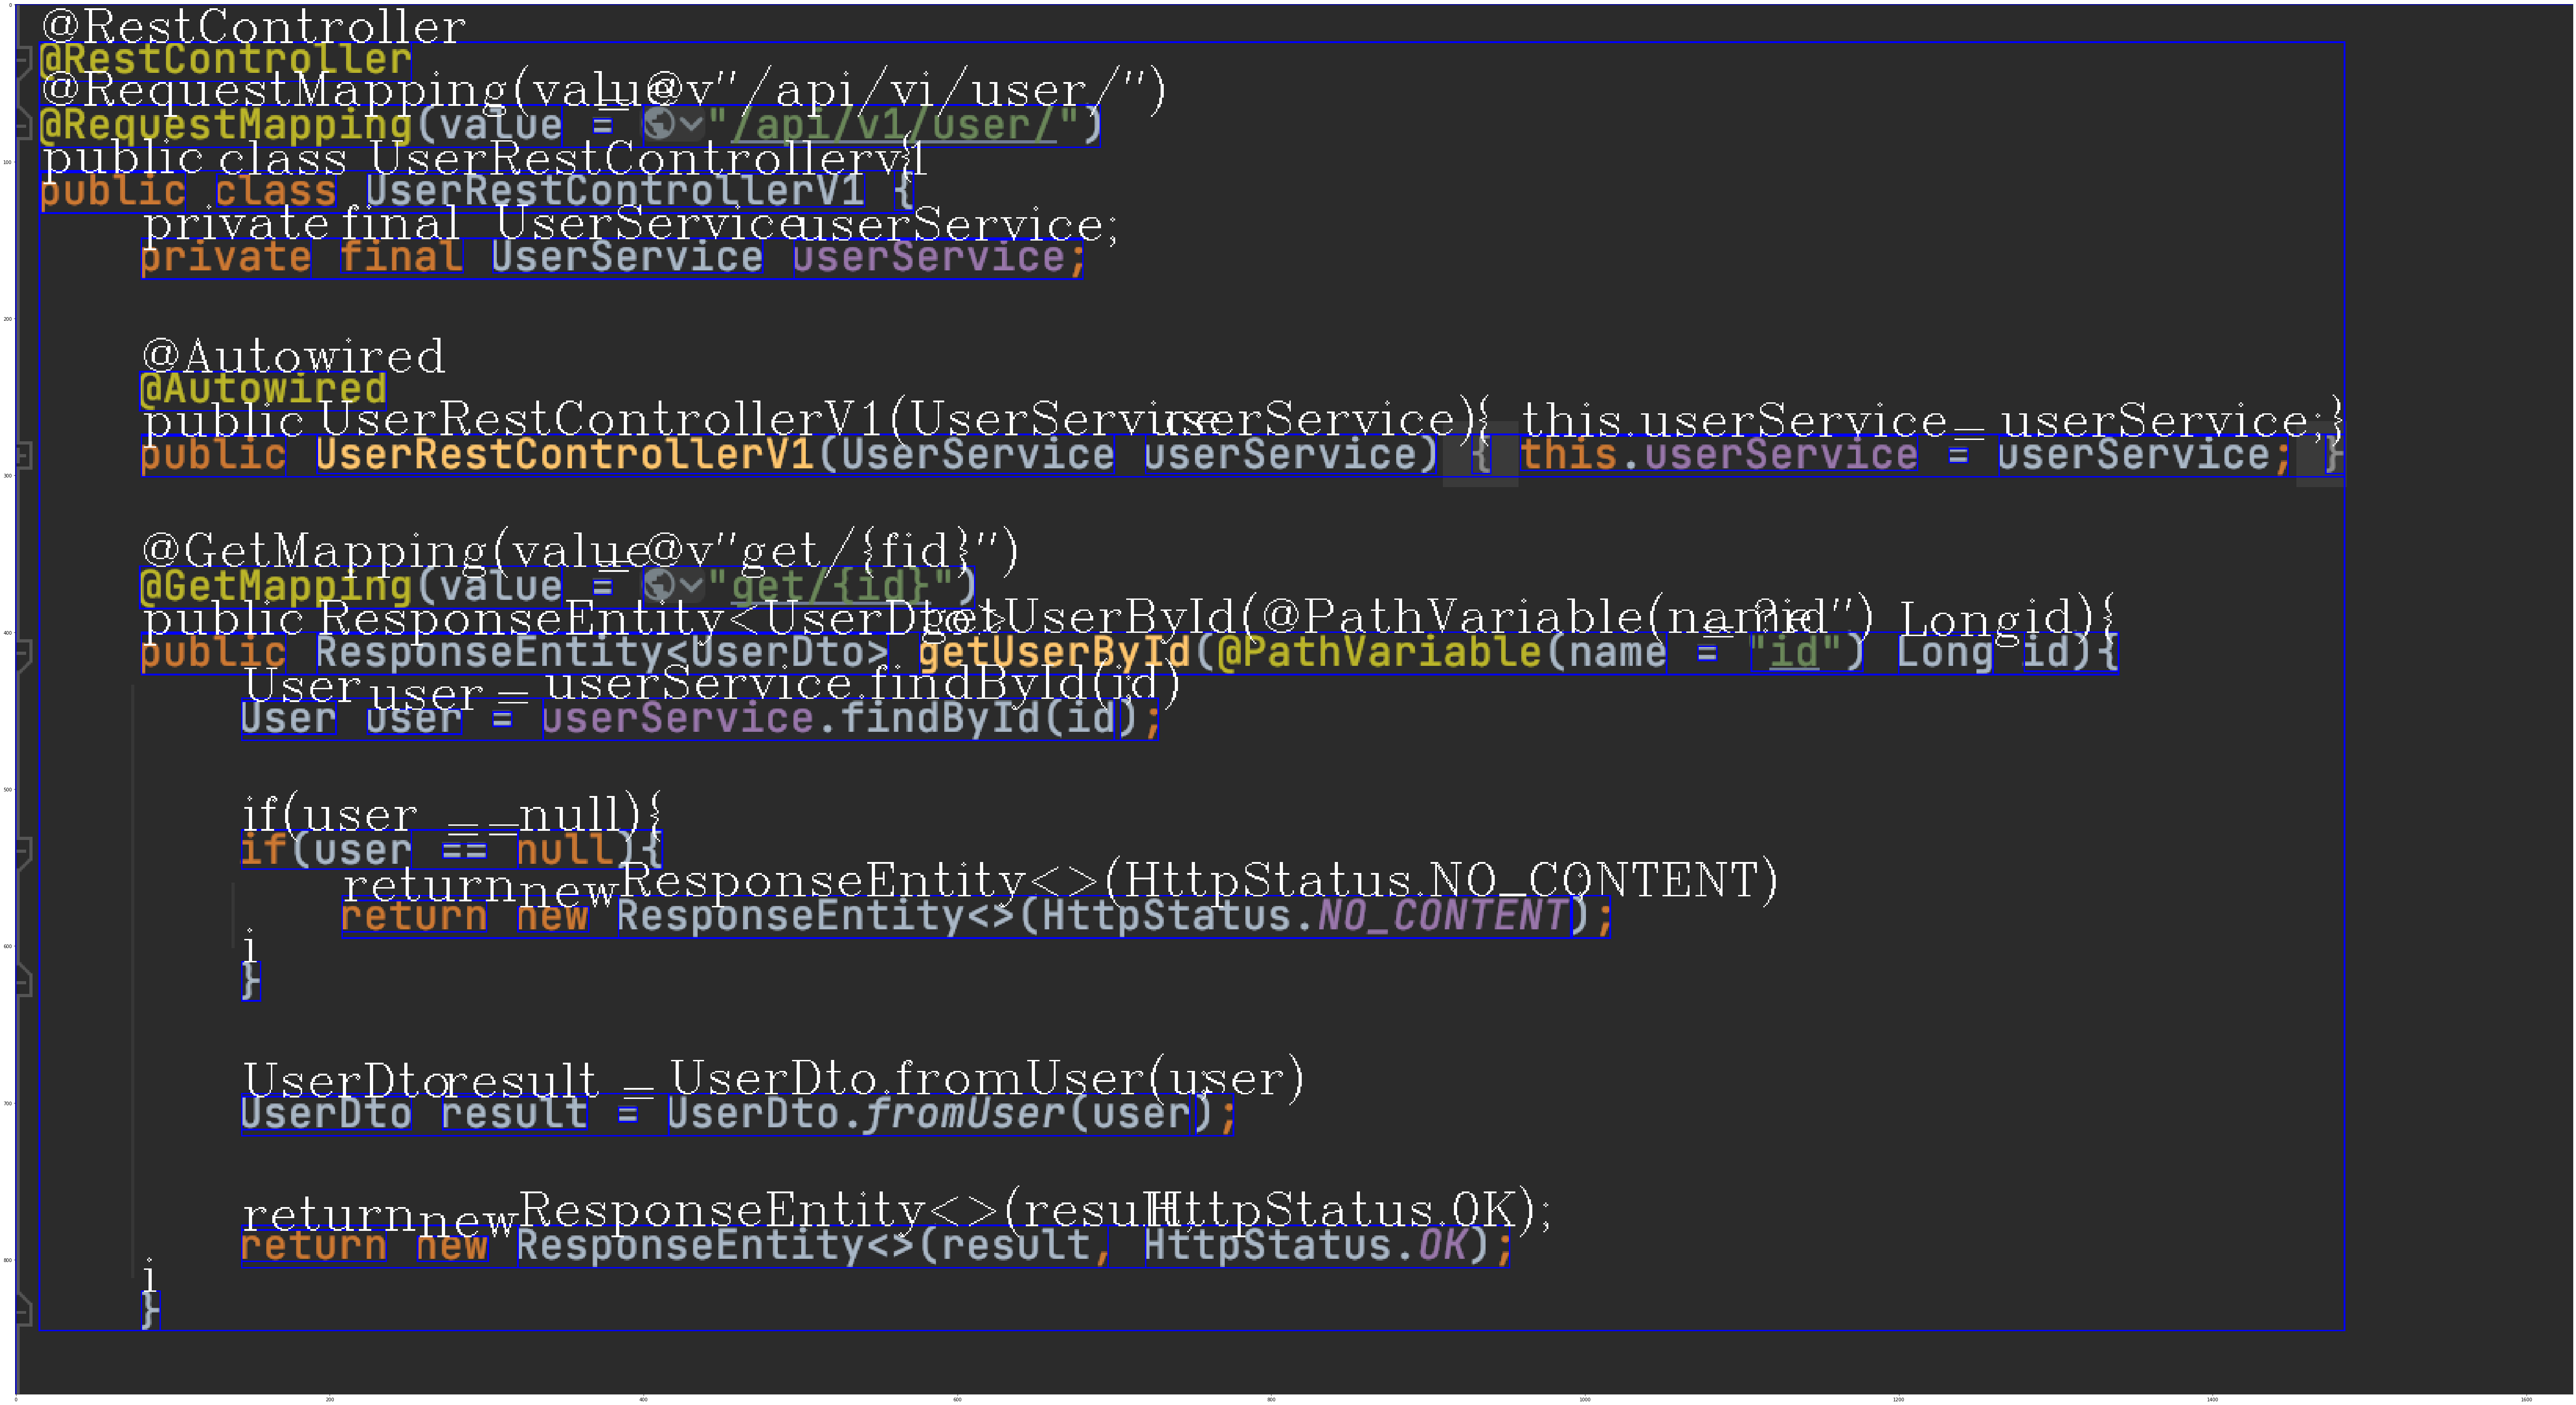

In [ ]:
from matplotlib import pyplot as plt

config = r'--oem 3 --psm 6'

img = cv2.imread('samplePhoto.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

data = pytesseract.image_to_data(img, config=config)

# Отображаем фото
plt.figure("Pure",figsize=(100,100))
plt.imshow(img)
plt.show()

# Перебираем данные по текстовые надписи
for i, el in enumerate(data.splitlines()):
	if i == 0:
		continue

	el = el.split()
	try:
		# Создаем подписи на картинке
		x, y, w, h = int(el[6]), int(el[7]), int(el[8]), int(el[9])
		cv2.rectangle(img, (x, y), (w + x, h + y), (0, 0, 255), 1)
		cv2.putText(img, el[11], (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 1)
	except IndexError:
		continue
  
# Отображаем фото
plt.figure("Result",figsize=(100,100))
plt.imshow(img)
plt.show()

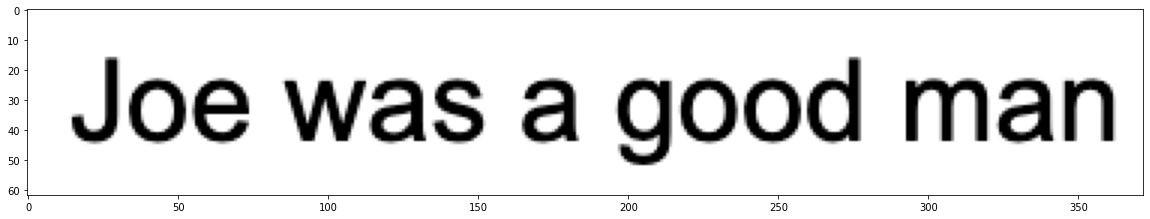

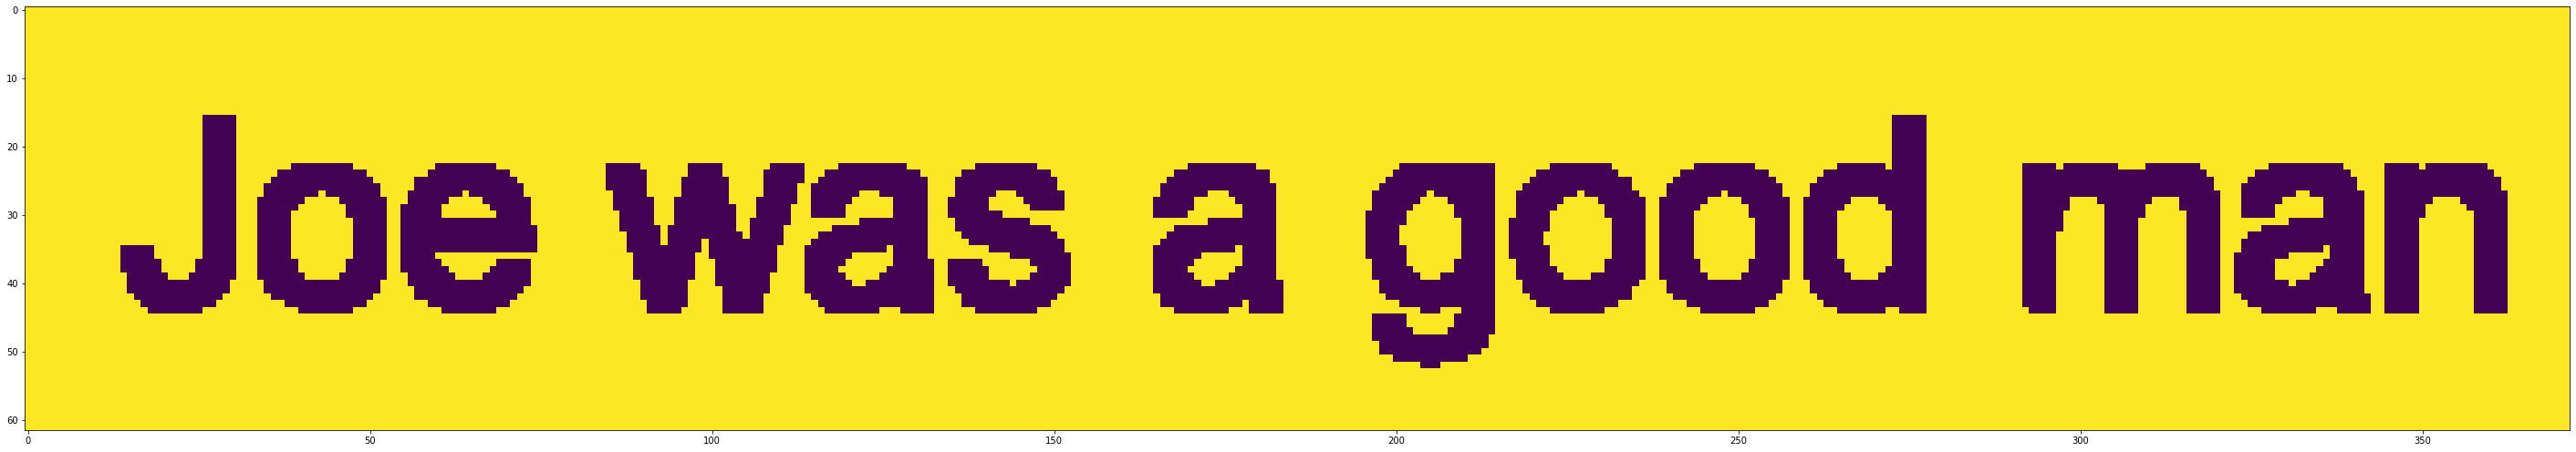

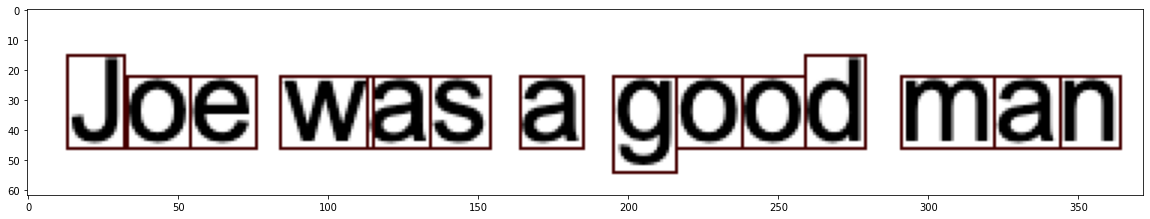

In [13]:
import numpy as np

# без использования библиотеки
image_file = "sample.png"
img = cv2.imread(image_file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
img_erode = cv2.erode(thresh, np.ones((3, 3), np.uint8), iterations=1)

# Находим контуры
contours, hierarchy = cv2.findContours(img_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

output = img.copy()

for idx, contour in enumerate(contours):
    (x, y, w, h) = cv2.boundingRect(contour)
    # hierarchy[i][0]: индекс следующего контура того же уровня
    # hierarchy[i][1]: индекс предыдущего контура того же уровня
    # hierarchy[i][2]: индекс первого ребенка
    # hierarchy[i][3]: индекс родителя
    if hierarchy[0][idx][3] == 0:
        cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)

plt.figure("Input",figsize=(20,20))
plt.imshow(img)
plt.figure("Enlarged",figsize=(50,50))
plt.imshow(img_erode)
plt.figure("Output", figsize=(20,20))
plt.imshow(output)

Мы получаем иерархическое дерево контуров (параметр cv2.RETR_TREE). Первым идет общий контур картинки, затем контуры букв, затем внутренние контуры. Нам нужны только контуры букв, поэтому я проверяю что «родительским» является общий контур.

Далее сохраяем каждую букву,отмасштабировав её до квадрата 28х28 (в том же формате что и база MNIST). Используем CV2 для кропа и масштабирования.

In [14]:
    image_file = "sample.png"
    img = cv2.imread(image_file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
    img_erode = cv2.erode(thresh, np.ones((3, 3), np.uint8), iterations=1)

    # Находим контуры
    contours, hierarchy = cv2.findContours(img_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    output = img.copy()

    letters = []
    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)
        # hierarchy[i][0]: индекс следующего контура того же уровня
        # hierarchy[i][1]: индекс предыдущего контура того же уровня
        # hierarchy[i][2]: индекс первого ребенка
        # hierarchy[i][3]: индекс родителя
        if hierarchy[0][idx][3] == 0:
            cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)
            letter_crop = gray[y:y + h, x:x + w]

            # Ресайз канваса в квадрат 
            size_max = max(w, h)
            letter_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)
            if w > h:
                # Увеличиваем изображение сверху-снизу
                y_pos = size_max//2 - h//2
                letter_square[y_pos:y_pos + h, 0:w] = letter_crop
            elif w < h:
                # Увеличиваем изображение слева-справа
                x_pos = size_max//2 - w//2
                letter_square[0:h, x_pos:x_pos + w] = letter_crop
            else:
                letter_square = letter_crop

            # Меняем размер на 28х28 добавляем букву и ее X-координату
            letters.append((x, w, cv2.resize(letter_square, (28, 28), interpolation=cv2.INTER_AREA)))

    # Сортируем по X-координате
    letters.sort(key=lambda x: x[0], reverse=False)

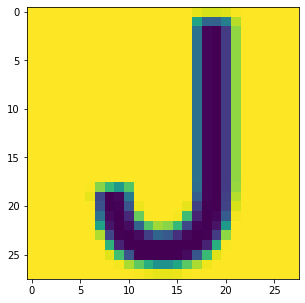

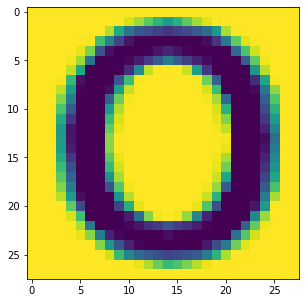

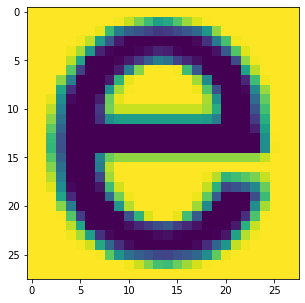

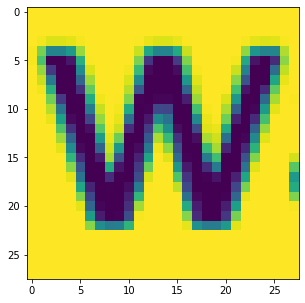

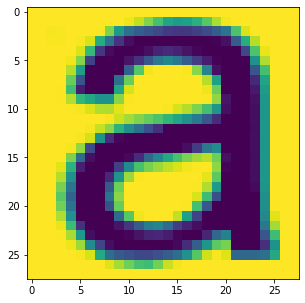

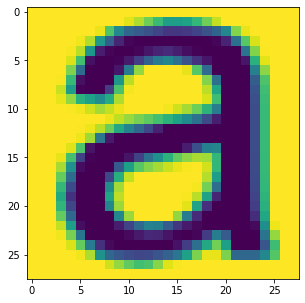

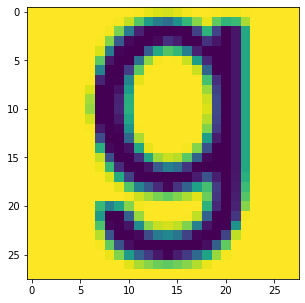

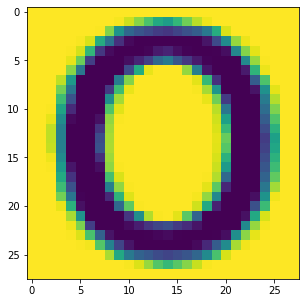

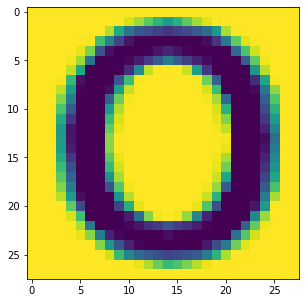

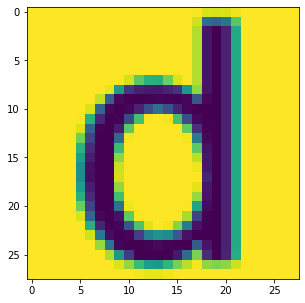

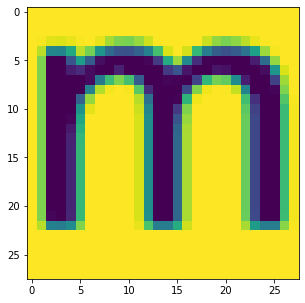

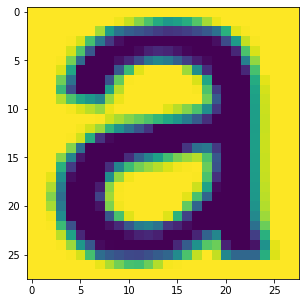

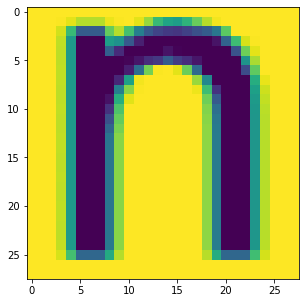

In [15]:
# Проверим что массив заполнен корректно
plt.figure("0",figsize=(5,5))
plt.imshow(letters[0][2])
plt.figure("1",figsize=(5,5))
plt.imshow(letters[1][2])
plt.figure("2",figsize=(5,5))
plt.imshow(letters[2][2])
plt.figure("3",figsize=(5,5))
plt.imshow(letters[3][2])
plt.figure("4",figsize=(5,5))
plt.imshow(letters[4][2])
plt.figure("5",figsize=(5,5))
plt.imshow(letters[5][2])
plt.figure("5",figsize=(5,5))
plt.imshow(letters[6][2])
plt.figure("7",figsize=(5,5))
plt.imshow(letters[7][2])
plt.figure("8",figsize=(5,5))
plt.imshow(letters[8][2])
plt.figure("9",figsize=(5,5))
plt.imshow(letters[9][2])
plt.figure("10",figsize=(5,5))
plt.imshow(letters[10][2])
plt.figure("11",figsize=(5,5))
plt.imshow(letters[11][2])
plt.figure("12",figsize=(5,5))
plt.imshow(letters[12][2])
plt.figure("13",figsize=(5,5))
plt.imshow(letters[13][2])

In [72]:
# Исходный датасет EMNIST имеет 62 разных символа
# Нейронная сеть имеет 62 выхода, на входе она будет получать изображения 28х28 (те что в массиве letters)
emnist_labels = [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122]

Далее мы видим классическую сверточная нейронную сеть, выделяющая признаки изображения (количество фильтров 32 и 64), к «выходу» которой подсоединена «линейная» сеть MLP, формирующая окончательный результат.

In [17]:
from tensorflow import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM, BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras import backend as K
from keras.constraints import maxnorm
import tensorflow as tf


model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=(3, 3), padding='valid', input_shape=(28, 28, 1), activation='relu'))
model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(emnist_labels), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
  

In [18]:
!pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp36-none-any.whl size=7905 sha256=5c59d208dabc4ee8ac5fb0031ac20a5ae40675ab83b10a139d437c757923b71c
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


Загружаем тестовые данные из бд Emnist

In [111]:
import idx2numpy 

emnist_path = '/content/emnist_folder/'
X_train = idx2numpy.convert_from_file(emnist_path + 'emnist-byclass-train-images-idx3-ubyte')
y_train = idx2numpy.convert_from_file(emnist_path + 'emnist-byclass-train-labels-idx1-ubyte')

X_test = idx2numpy.convert_from_file(emnist_path + 'emnist-byclass-test-images-idx3-ubyte')
y_test = idx2numpy.convert_from_file(emnist_path + 'emnist-byclass-test-labels-idx1-ubyte')

X_train = np.reshape(X_train, (X_train.shape[0], 28, 28, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 28, 28, 1))

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, len(emnist_labels))

# Беру десятую часть датасета
k = 5
X_train = X_train[:X_train.shape[0] // k]
y_train = y_train[:y_train.shape[0] // k]
X_test = X_test[:X_test.shape[0] // k]
y_test = y_test[:y_test.shape[0] // k]

# Нормируем
X_train = X_train.astype(np.float32)
X_train /= 255.0
X_test = X_test.astype(np.float32)
X_test /= 255.0

x_train_cat = keras.utils.to_categorical(y_train, len(emnist_labels))
y_test_cat = keras.utils.to_categorical(y_test, len(emnist_labels))


(697932, 28, 28, 1) (697932,) (116323, 28, 28, 1) (116323,) 62


In [112]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

model.fit(X_train, x_train_cat, validation_data=(X_test, y_test_cat), callbacks=[learning_rate_reduction], batch_size=64, epochs=30)

model.save('emnist_letters.h5')

Epoch 1/30
2182/2182 [==============================] - 445s 204ms/step - loss: 1.5147 - accuracy: 0.5965 - val_loss: 1.2161 - val_accuracy: 0.6696
Epoch 2/30
2182/2182 [==============================] - 440s 201ms/step - loss: 1.4873 - accuracy: 0.6026 - val_loss: 1.1939 - val_accuracy: 0.6727
Epoch 3/30
2182/2182 [==============================] - 440s 202ms/step - loss: 1.4647 - accuracy: 0.6078 - val_loss: 1.1746 - val_accuracy: 0.6769
Epoch 4/30
2182/2182 [==============================] - 442s 202ms/step - loss: 1.4523 - accuracy: 0.6104 - val_loss: 1.1571 - val_accuracy: 0.6817
Epoch 5/30
2182/2182 [==============================] - 442s 203ms/step - loss: 1.4329 - accuracy: 0.6131 - val_loss: 1.1408 - val_accuracy: 0.6863
Epoch 6/30
2182/2182 [==============================] - 439s 201ms/step - loss: 1.4163 - accuracy: 0.6170 - val_loss: 1.1260 - val_accuracy: 0.6893
Epoch 7/30
2182/2182 [==============================] - 441s 202ms/step - loss: 1.3999 - accuracy: 0.6212 - val_

Получаем: val_accuracy: 0.7346


Дубликат кода выше, для разделения исходного изображения на буквы

In [113]:
def letters_extract(image_file: str, out_size=28):
    img = cv2.imread(image_file)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
    img_erode = cv2.erode(thresh, np.ones((3, 3), np.uint8), iterations=1)

    contours, hierarchy = cv2.findContours(img_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    output = img.copy()

    letters = []
    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)
        if hierarchy[0][idx][3] == 0:
            cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)
            letter_crop = gray[y:y + h, x:x + w]
            size_max = max(w, h)
            letter_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)
            if w > h:
                y_pos = size_max//2 - h//2
                letter_square[y_pos:y_pos + h, 0:w] = letter_crop
            elif w < h:
                x_pos = size_max//2 - w//2
                letter_square[0:h, x_pos:x_pos + w] = letter_crop
            else:
                letter_square = letter_crop

            # 28x28 и X-координата
            letters.append((x, w, cv2.resize(letter_square, (out_size, out_size), interpolation=cv2.INTER_AREA)))

    letters.sort(key=lambda x: x[0], reverse=False)

    return letters

Далее даем нашей нейронке на вход изображение буквы и получем лейбл из emnist_label и переводим из chr кода в chr, также переворачиваем исходные изображения

In [114]:
model = keras.models.load_model('emnist_letters.h5')

 # Распознаем char значаение 1 буквы
def emnist_predict_img(model, img):
    img_arr = np.expand_dims(img, axis=0)
    img_arr = 1 - img_arr/255.0
    img_arr[0] = np.rot90(img_arr[0], 3)
    img_arr[0] = np.fliplr(img_arr[0])
    img_arr = img_arr.reshape((1, 28, 28, 1))

    result = np.argmax(model.predict([img_arr]), axis=-1)
    res = emnist_labels[result[0]]
    # print(res)
    return chr(res)

Повторяем для всех букв из изображения

In [115]:
def img_to_str(model, image_file: str):
    letters = letters_extract(image_file)
    s_out = ""
    for i in range(len(letters)):
        dn = letters[i+1][0] - letters[i][0] - letters[i][1] if i < len(letters) - 1 else 0
        s_out += emnist_predict_img(model, letters[i][2])
        if (dn > letters[i][1]/4):
            s_out += ' '
    return s_out

In [116]:
model = keras.models.load_model('emnist_letters.h5')
s_out = img_to_str(model, "sample.png")
print("Origin: Joe was a good man")
print("Recognized: " + s_out)


Origin: Joe was a good man
Recognized: j0B WBS B 800U TBn
